In [ ]:
#Start here

#Copy ABT file to local google colab storage. 
#!gdown --id 1d_gZPMsu16SP2MxtSZWlFuvKcbepb8Ua
!gdown --id 1Xslq_NIG326gSu5hl3Dd7GrsmSmHVxAh

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Xslq_NIG326gSu5hl3Dd7GrsmSmHVxAh
To: /content/abt_count.csv
100% 84.4M/84.4M [00:00<00:00, 88.5MB/s]


In [ ]:
import pandas as pd
# Load abt file
df = pd.read_csv('abt_count.csv')


In [ ]:
df1=df.groupby('user_id')['Vegetable_food','White_meat','Red_meat','Sea_food'].sum().reset_index()
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,user_id,Vegetable_food,White_meat,Red_meat,Sea_food
0,--17Db1K-KujRuN7hY9Z0Q,1,0,1,6
1,--CprxtcUfzKoz29hAzm5w,1,1,0,0
2,--VvAh01g1mZJJ3q9Dqp7Q,0,1,3,0
3,--ZNfWKj1VyVElRx6-g1fg,0,0,0,1
4,--rms0ED1Ok7OFqZILWiAg,0,0,0,0
...,...,...,...,...,...
27922,zz1eGPK5v8S5IlPfMo7Y5A,0,0,0,0
27923,zz6ebkIVHwThVzQbsJKJ8w,7,0,1,8
27924,zz9XyBj-pf7u5cU5lBW6xw,0,0,1,0
27925,zzaq5Fn1U2Feut3dGxidNg,1,0,0,0


In [ ]:
df=df[['user_id','name','address','stars_x']]
df.columns=['user_id','name','address','user_stars']

In [ ]:
df.head()

,user_id,name,address,user_stars
0,JYYYKt6TdVA4ng9lLcXt_g,Santa Barbara Shellfish Company,230 Stearns Wharf,5.0
1,LcqNuhqaYt5ekKzaRirmIg,Santa Barbara Shellfish Company,230 Stearns Wharf,5.0
2,Q_ixtOGUKUbCQ_sXThQAwA,Santa Barbara Shellfish Company,230 Stearns Wharf,5.0
3,v8aeoMqdrClqfZxNB4lWCA,Santa Barbara Shellfish Company,230 Stearns Wharf,3.0
4,KLS_AWthM9n6KLcBTCF_RQ,Santa Barbara Shellfish Company,230 Stearns Wharf,5.0


In [ ]:
#df=df[['user_id','Vegetable_food','White_meat','Red_meat','Sea_food']]
df1.columns=['user_id','veg','white_meat','red_meat','seafood']
df1.head()

,user_id,veg,white_meat,red_meat,seafood
0,--17Db1K-KujRuN7hY9Z0Q,1,0,1,6
1,--CprxtcUfzKoz29hAzm5w,1,1,0,0
2,--VvAh01g1mZJJ3q9Dqp7Q,0,1,3,0
3,--ZNfWKj1VyVElRx6-g1fg,0,0,0,1
5,-0-TtVhV4PIUoDpUCOC0uQ,2,0,0,0


In [ ]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [ ]:
# input matrix for segmentation
X = df1[['veg','white_meat','red_meat','seafood']].values
X

array([[1, 0, 1, 6],
       [1, 1, 0, 0],
       [0, 1, 3, 0],
       ...,
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 3]])

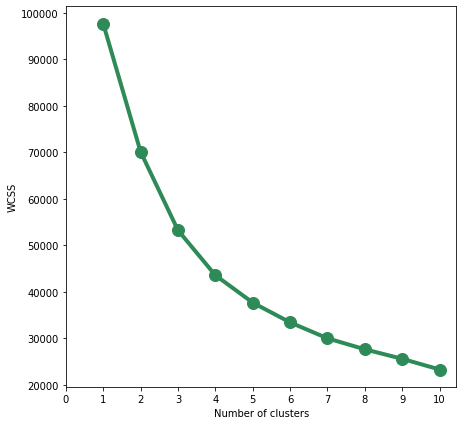

In [ ]:
# elbow method using WCSS to find most optimal value for k

wcss = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X)
    wcss.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),wcss, linewidth=4, markersize=12,marker='o',color = 'seagreen')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# finding the clusters 
model = KMeans(n_clusters = 6, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
clusters = model.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



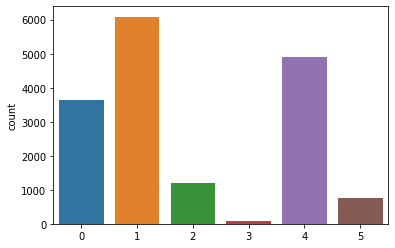

In [ ]:
# number of clusters and number of users using countplot
sns.countplot(clusters)

In [ ]:
df1['clusters']=clusters

In [ ]:
df1.head(10)

,user_id,veg,white_meat,red_meat,seafood,clusters
0,--17Db1K-KujRuN7hY9Z0Q,1,0,1,6,5
1,--CprxtcUfzKoz29hAzm5w,1,1,0,0,1
2,--VvAh01g1mZJJ3q9Dqp7Q,0,1,3,0,4
3,--ZNfWKj1VyVElRx6-g1fg,0,0,0,1,4
5,-0-TtVhV4PIUoDpUCOC0uQ,2,0,0,0,1
6,-03KNborulicFEWIsZKDUQ,0,0,0,1,4
7,-09MjuD1Q0KwSYwdYbAzMw,1,1,0,0,1
8,-0EcgtUXe1rzrkmdih_tYg,0,1,1,2,0
10,-0TDPqsNDa_PfAhr4_Zoqg,1,0,2,1,1
14,-0hBIXL5KPo2rMPKB-y8pA,0,0,0,1,4


In [ ]:
new=pd.merge(df,df1,on='user_id',how='inner')
new.head()

,user_id,name,address,user_stars,veg,white_meat,red_meat,seafood,clusters
0,JYYYKt6TdVA4ng9lLcXt_g,Santa Barbara Shellfish Company,230 Stearns Wharf,5.0,0,0,1,3,0
1,LcqNuhqaYt5ekKzaRirmIg,Santa Barbara Shellfish Company,230 Stearns Wharf,5.0,3,0,0,6,5
2,v8aeoMqdrClqfZxNB4lWCA,Santa Barbara Shellfish Company,230 Stearns Wharf,3.0,2,0,0,3,0
3,KLS_AWthM9n6KLcBTCF_RQ,Santa Barbara Shellfish Company,230 Stearns Wharf,5.0,0,0,0,3,0
4,KLS_AWthM9n6KLcBTCF_RQ,The Lark,"131 Anacapa St, Ste A",5.0,0,0,0,3,0


# Anisha-Section for only top 10

# K-means-> with standardization



In [1]:
#Start here

#Copy ABT file to local google colab storage. 
!gdown --id 1TbetSTPGn8hT0jZIlfrQfbZO29xHqt9j
!gdown --id 1l9AYPnqbq8SpndYdkvPgIqdH9VgSDQ_o

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TbetSTPGn8hT0jZIlfrQfbZO29xHqt9j
To: /content/abt_count_top10.csv
100% 52.8M/52.8M [00:00<00:00, 54.7MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1l9AYPnqbq8SpndYdkvPgIqdH9VgSDQ_o
To: /content/abt_count_bottom10.csv
100% 98.9k/98.9k [00:00<00:00, 54.6MB/s]


In [2]:
import pandas as pd
# Load abt file

df = pd.read_csv('abt_count_top10.csv')
df = df.drop('Unnamed: 0', axis=1)
df=df.append(pd.read_csv('abt_count_bottom10.csv'))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21861 entries, 0 to 50
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        21861 non-null  object 
 1   user_id          21861 non-null  object 
 2   business_id      21861 non-null  object 
 3   stars_x          21861 non-null  float64
 4   useful           21861 non-null  int64  
 5   funny            21861 non-null  int64  
 6   cool             21861 non-null  int64  
 7   text             21861 non-null  object 
 8   date             21861 non-null  object 
 9   name             21861 non-null  object 
 10  address          21855 non-null  object 
 11  city             21861 non-null  object 
 12  state            21861 non-null  object 
 13  postal_code      21861 non-null  int64  
 14  latitude         21861 non-null  float64
 15  longitude        21861 non-null  float64
 16  stars_y          21861 non-null  float64
 17  review_count   

In [3]:
df['stars_x'].unique()


array([5., 3., 4., 1., 2.])

In [4]:
df = df[df.stars_x !=" 'ocean'"]

In [5]:
df1=df.groupby('user_id')['Vegetable_food','White_meat','Red_meat','Sea_food'].sum().reset_index()
df1

<ipython-input-5-5b2642ef61c2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby('user_id')['Vegetable_food','White_meat','Red_meat','Sea_food'].sum().reset_index()


,user_id,Vegetable_food,White_meat,Red_meat,Sea_food
0,--17Db1K-KujRuN7hY9Z0Q,1,0,1,6
1,--ZNfWKj1VyVElRx6-g1fg,0,0,0,1
2,--rms0ED1Ok7OFqZILWiAg,0,0,0,0
3,-0-TtVhV4PIUoDpUCOC0uQ,2,0,0,0
4,-03KNborulicFEWIsZKDUQ,0,0,0,1
...,...,...,...,...,...
18717,zxT0h6GNRFLiIXwZJTCZpw,1,0,0,2
18718,zz1eGPK5v8S5IlPfMo7Y5A,0,0,0,0
18719,zz6ebkIVHwThVzQbsJKJ8w,2,0,0,8
18720,zzaq5Fn1U2Feut3dGxidNg,1,0,0,0


In [6]:
# dropping rows with all 0's
df_new = df1.loc[(df1['Vegetable_food'] ==0) & (df1['White_meat'] ==0) & (df1['Red_meat'] ==0) & (df1['Sea_food'] ==0)]
df1=pd.concat([df1, df_new]).drop_duplicates(keep=False)
df1

,user_id,Vegetable_food,White_meat,Red_meat,Sea_food
0,--17Db1K-KujRuN7hY9Z0Q,1,0,1,6
1,--ZNfWKj1VyVElRx6-g1fg,0,0,0,1
3,-0-TtVhV4PIUoDpUCOC0uQ,2,0,0,0
4,-03KNborulicFEWIsZKDUQ,0,0,0,1
5,-0EcgtUXe1rzrkmdih_tYg,0,0,0,2
...,...,...,...,...,...
18716,zxLjPGBLWgXpHtFjxX9WUA,0,0,0,1
18717,zxT0h6GNRFLiIXwZJTCZpw,1,0,0,2
18719,zz6ebkIVHwThVzQbsJKJ8w,2,0,0,8
18720,zzaq5Fn1U2Feut3dGxidNg,1,0,0,0


In [7]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [8]:
#df=df[['user_id','Vegetable_food','White_meat','Red_meat','Sea_food']]
df1.columns=['user_id','veg','white_meat','red_meat','seafood']
df1.head()

,user_id,veg,white_meat,red_meat,seafood
0,--17Db1K-KujRuN7hY9Z0Q,1,0,1,6
1,--ZNfWKj1VyVElRx6-g1fg,0,0,0,1
3,-0-TtVhV4PIUoDpUCOC0uQ,2,0,0,0
4,-03KNborulicFEWIsZKDUQ,0,0,0,1
5,-0EcgtUXe1rzrkmdih_tYg,0,0,0,2


In [9]:
# input matrix for segmentation
X = df1[['veg','white_meat','red_meat','seafood']].values
X

array([[1, 0, 1, 6],
       [0, 0, 0, 1],
       [2, 0, 0, 0],
       ...,
       [2, 0, 0, 8],
       [1, 0, 0, 0],
       [0, 0, 0, 3]])

In [10]:
len(X)

11679

In [11]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # transform data
# scaled = scaler.fit_transform(X)
# print(scaled)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)
print(scaled)

[[ 0.00994478 -0.34895556  1.13265466  2.89400839]
 [-0.70260168 -0.34895556 -0.49024729 -0.2505642 ]
 [ 0.72249124 -0.34895556 -0.49024729 -0.87947871]
 ...
 [ 0.72249124 -0.34895556 -0.49024729  4.15183743]
 [ 0.00994478 -0.34895556 -0.49024729 -0.87947871]
 [-0.70260168 -0.34895556 -0.49024729  1.00726484]]


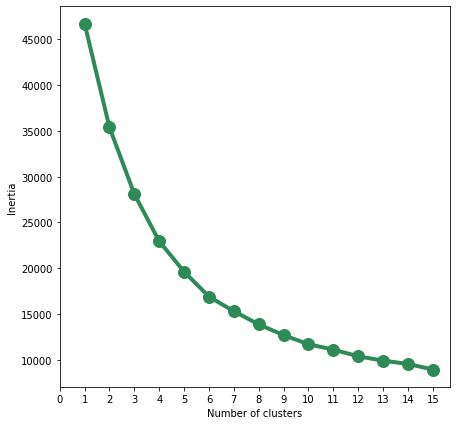

In [13]:
from sklearn.cluster import KMeans
inertia=[]
# data = list(zip(x, y))
for i in range(1,16):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(scaled)
    inertia.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,16),inertia, linewidth=4, markersize=12,marker='o',color = 'seagreen')
plt.xticks(np.arange(16))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [15]:
kmeans.inertia_

18509.826419548168

In [16]:
centers = np.array(kmeans.cluster_centers_)
centers
centroid = pd.DataFrame(centers)
centroid

,0,1,2,3
0,1.512547,0.141782,0.336575,0.109473
1,0.463927,0.056462,0.137704,2.458281
2,0.176409,0.127566,0.311769,0.759158
3,1.703748,0.120919,0.307134,4.978235
4,8.875000,0.708333,2.020833,9.145833
5,4.664940,0.324698,0.803109,1.153713


In [17]:
# finding the clusters 
model = KMeans(n_clusters = 6, init = "k-means++", max_iter = 50, n_init = 10, random_state = 0)
clusters = model.fit_predict(scaled)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



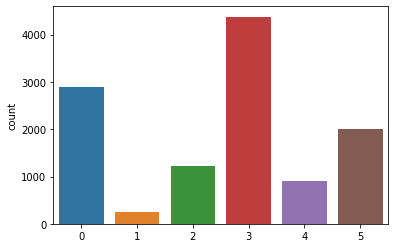

In [18]:
sns.countplot(clusters)

In [19]:
df1['clusters']=clusters

In [20]:
df1

,user_id,veg,white_meat,red_meat,seafood,clusters
0,--17Db1K-KujRuN7hY9Z0Q,1,0,1,6,4
1,--ZNfWKj1VyVElRx6-g1fg,0,0,0,1,3
3,-0-TtVhV4PIUoDpUCOC0uQ,2,0,0,0,0
4,-03KNborulicFEWIsZKDUQ,0,0,0,1,3
5,-0EcgtUXe1rzrkmdih_tYg,0,0,0,2,3
...,...,...,...,...,...,...
18716,zxLjPGBLWgXpHtFjxX9WUA,0,0,0,1,3
18717,zxT0h6GNRFLiIXwZJTCZpw,1,0,0,2,3
18719,zz6ebkIVHwThVzQbsJKJ8w,2,0,0,8,4
18720,zzaq5Fn1U2Feut3dGxidNg,1,0,0,0,0


In [25]:
new=pd.merge(df,df1,on='user_id',how='inner')

new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14343 entries, 0 to 14342
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        14343 non-null  object 
 1   user_id          14343 non-null  object 
 2   business_id      14343 non-null  object 
 3   stars_x          14343 non-null  float64
 4   useful           14343 non-null  int64  
 5   funny            14343 non-null  int64  
 6   cool             14343 non-null  int64  
 7   text             14343 non-null  object 
 8   date             14343 non-null  object 
 9   name             14343 non-null  object 
 10  address          14337 non-null  object 
 11  city             14343 non-null  object 
 12  state            14343 non-null  object 
 13  postal_code      14343 non-null  int64  
 14  latitude         14343 non-null  float64
 15  longitude        14343 non-null  float64
 16  stars_y          14343 non-null  float64
 17  review_count

In [26]:
new[['user_id','name','Tokenized','stars_x','clusters']].head()

,user_id,name,Tokenized,stars_x,clusters
0,JYYYKt6TdVA4ng9lLcXt_g,Santa Barbara Shellfish Company,"['bit', 'weary', 'trying', 'shellfish', 'compa...",5.0,5
1,LcqNuhqaYt5ekKzaRirmIg,Santa Barbara Shellfish Company,"['love', 'trying', 'fresh', 'seafood', 'piers,...",5.0,4
2,v8aeoMqdrClqfZxNB4lWCA,Santa Barbara Shellfish Company,"['seafood', 'restaurant', 'edge', 'pear', 'exp...",3.0,4
3,KLS_AWthM9n6KLcBTCF_RQ,Santa Barbara Shellfish Company,"['according', 'experience,', 'one', 'place', '...",5.0,3
4,KLS_AWthM9n6KLcBTCF_RQ,The Lark,"['looking', 'good', 'value', 'hard-earned', 'm...",5.0,3


# Implementing Own Collaborative Filtering Algo for 0th cluster

In [ ]:
df_clus_0 = df1.loc[(df1['clusters'] ==0)]
# df_new.to_csv('cluster0.csv')
df_clus_0

,user_id,veg,white_meat,red_meat,seafood,clusters
3,-0-TtVhV4PIUoDpUCOC0uQ,2,0,0,0,0
11,-1FfAU3DcO0z9dWzXy5TAQ,3,0,0,0,0
13,-1WbN1Qd-opw8u3uEqs2Kg,1,0,0,0,0
16,-2DZSvKJSLkoZC9ztPYXmg,1,0,0,0,0
17,-2SzFdggGxJKY9KcfLtIUQ,2,0,0,2,0
...,...,...,...,...,...,...
18706,zuPjUmHmYz1TIiamDjgJgg,1,0,0,0,0
18710,zw2d045lP31wLfFy3LU-GA,1,0,0,1,0
18712,zwKmdDQrgNVRt_U0Qak38w,3,0,0,0,0
18714,zxAM0cdIbZZYN-6gVQuntQ,2,0,0,0,0


In [ ]:
df_bus = df[["user_id",'stars_x','name']]
df_bus

,user_id,stars_x,name
0,JYYYKt6TdVA4ng9lLcXt_g,5.0,Santa Barbara Shellfish Company
1,LcqNuhqaYt5ekKzaRirmIg,5.0,Santa Barbara Shellfish Company
2,Q_ixtOGUKUbCQ_sXThQAwA,5.0,Santa Barbara Shellfish Company
3,v8aeoMqdrClqfZxNB4lWCA,3.0,Santa Barbara Shellfish Company
4,KLS_AWthM9n6KLcBTCF_RQ,5.0,Santa Barbara Shellfish Company
...,...,...,...
46,2z82VHOqdX1HC1Hzjau-Pg,5.0,Hotdog Mini Mart
47,yr6_LyQOfqNMOyPntBKV2A,4.0,Hotdog Mini Mart
48,wocdHbgYu0zTgECrxi_QVA,4.0,Hotdog Mini Mart
49,5B9KDtNyTf1pHsKJ2B0nlg,5.0,Hotdog Mini Mart


In [ ]:
df_y=df_bus.loc[df_bus['user_id'].isin(df_clus_0['user_id'])]
df_y

,user_id,stars_x,name
7,HYlb7vXGuiTvR5eiwSLBoA,5.0,Santa Barbara Shellfish Company
12,UrKgCQvSTSUay1GNCkjnhA,1.0,Santa Barbara Shellfish Company
28,9OJdZbS-8DiEtzqicUYQ8g,3.0,Santa Barbara Shellfish Company
49,6vpn5TCLjx-FCI0ruuH6-w,5.0,Santa Barbara Shellfish Company
61,yANxzXdYOWLTU42T4o4Xsw,5.0,Santa Barbara Shellfish Company
...,...,...,...
21771,gE3kMyotq08EXHEnorbcHA,5.0,Boathouse at Hendry's Beach
21799,c1wNIqb8TqICTVFvrPpKvQ,1.0,Boathouse at Hendry's Beach
2,weom5rHPTmODQYXJA_jydg,5.0,The Mill
5,hgUSn_pO-HWU949eY4hCOA,4.0,Harbor of Santa Barbara Inc


In [ ]:
df_y.stars_x = df_y.stars_x.astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# df_y=df_y.groupby(['user_id','name'])['stars_x'].mean().reset_index()

In [ ]:
df_y.stars_x.unique()

array([3.5       , 4.        , 5.        , 2.        , 3.        ,
       1.        , 4.71428571, 4.5       , 2.5       , 4.75      ])

In [ ]:
# No need to run this
# df_y.stars_x=df_y.stars_x.apply(np.floor)


In [ ]:
df_y

,user_id,name,stars_x
0,-0-TtVhV4PIUoDpUCOC0uQ,Los Agaves,3.5
1,-1FfAU3DcO0z9dWzXy5TAQ,Mesa Verde,4.0
2,-1WbN1Qd-opw8u3uEqs2Kg,La Super-Rica Taqueria,5.0
3,-1WbN1Qd-opw8u3uEqs2Kg,Los Agaves,2.0
4,-1WbN1Qd-opw8u3uEqs2Kg,Santa Barbara Shellfish Company,5.0
...,...,...,...
3208,zuPjUmHmYz1TIiamDjgJgg,La Super-Rica Taqueria,5.0
3209,zw2d045lP31wLfFy3LU-GA,Santa Barbara Shellfish Company,3.0
3210,zwKmdDQrgNVRt_U0Qak38w,Los Agaves,5.0
3211,zxAM0cdIbZZYN-6gVQuntQ,Mesa Verde,3.0


In [ ]:
#User-Item similarity matrix 
pivoted = df_y.pivot(index='user_id',columns='name',values='stars_x')
pivoted.columns.name=None
pivoted.to_csv('pivoted.csv')
pivoted_df=pivoted

In [ ]:
#User-Item similarity matrix 
pivoted_df=pivoted_df.fillna(0)
pivoted_df

,Boathouse at Hendry's Beach,Brophy Bros - Santa Barbara,Harbor of Santa Barbara Inc,John Dunn Gourmet Dining Room,La Super-Rica Taqueria,Los Agaves,Lure Fish House,Mesa Verde,Sandbar,Santa Barbara Shellfish Company,The Lark,The Mill,The Palace Grill
user_id,,,,,,,,,,,,,
-0-TtVhV4PIUoDpUCOC0uQ,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1FfAU3DcO0z9dWzXy5TAQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
-1WbN1Qd-opw8u3uEqs2Kg,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
-2DZSvKJSLkoZC9ztPYXmg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
-2SzFdggGxJKY9KcfLtIUQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuPjUmHmYz1TIiamDjgJgg,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zw2d045lP31wLfFy3LU-GA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
zwKmdDQrgNVRt_U0Qak38w,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#cosine similarity between user-user similarity matrix 
from sklearn.metrics.pairwise import cosine_similarity
cos_df=cosine_similarity(pivoted_df, pivoted_df)
np.fill_diagonal(cos_df, -np.inf)
cos_df

array([[      -inf, 0.        , 0.27216553, ..., 1.        , 0.        ,
        0.        ],
       [0.        ,       -inf, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.27216553, 0.        ,       -inf, ..., 0.27216553, 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.27216553, ...,       -inf, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        ,       -inf,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
              -inf]])

In [ ]:
cos_df = pd.DataFrame(cos_df)
cos_df

,0,1,2,3,4,5,6,7,8,9,...,2893,2894,2895,2896,2897,2898,2899,2900,2901,2902
0,-inf,0.0,0.272166,0.0,0.000000,1.000000,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0
1,0.000000,-inf,0.000000,1.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,...,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0
2,0.272166,0.0,-inf,0.0,0.680414,0.272166,0.0,0.0,0.0,0.272166,...,0.0,0.0,0.0,0.0,0.680414,0.680414,0.680414,0.272166,0.0,0.0
3,0.000000,1.0,0.000000,-inf,0.000000,0.000000,0.0,0.0,1.0,0.000000,...,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0
4,0.000000,0.0,0.680414,0.0,-inf,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,0.000000,0.0,0.680414,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.000000,-inf,0.000000,0.000000,0.0,0.0
2899,0.000000,0.0,0.680414,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,-inf,0.000000,0.0,0.0
2900,1.000000,0.0,0.272166,0.0,0.000000,1.000000,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-inf,0.0,0.0
2901,0.000000,1.0,0.000000,1.0,0.000000,0.000000,0.0,0.0,1.0,0.000000,...,1.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,-inf,0.0


In [ ]:
maxValues = cos_df.idxmax(axis=1).reset_index()
maxValues

,index,0
0,0,5
1,1,3
2,2,2102
3,3,1
4,4,105
...,...,...
2898,2898,20
2899,2899,4
2900,2900,0
2901,2901,1


In [ ]:
# find the maximum values of each row to find max similarity among users
maxValues = cos_df.idxmax(axis=1).reset_index()
maxValues.rename(columns = {'index':'TargetUser',0:'MostSimilarUser'}, inplace = True)
maxValues['TargetUser'] = pivoted_df.index
maxValues['MostSimilarUser']=pivoted_df.index[maxValues['MostSimilarUser']]
maxValues
maxValues[maxValues['TargetUser'] == '-1FfAU3DcO0z9dWzXy5TAQ'].MostSimilarUser

1    -2DZSvKJSLkoZC9ztPYXmg
Name: MostSimilarUser, dtype: object

In [ ]:
user_max_rating=pivoted_df.idxmax(axis=1).reset_index()
user_max_rating.rename(columns = {0:'RestaurantToRecommend','user_id':'MostSimilarUser'}, inplace = True)
user_max_rating

,MostSimilarUser,RestaurantToRecommend
0,-0-TtVhV4PIUoDpUCOC0uQ,Los Agaves
1,-1FfAU3DcO0z9dWzXy5TAQ,Mesa Verde
2,-1WbN1Qd-opw8u3uEqs2Kg,La Super-Rica Taqueria
3,-2DZSvKJSLkoZC9ztPYXmg,Mesa Verde
4,-2SzFdggGxJKY9KcfLtIUQ,Santa Barbara Shellfish Company
...,...,...
2898,zuPjUmHmYz1TIiamDjgJgg,La Super-Rica Taqueria
2899,zw2d045lP31wLfFy3LU-GA,Santa Barbara Shellfish Company
2900,zwKmdDQrgNVRt_U0Qak38w,Los Agaves
2901,zxAM0cdIbZZYN-6gVQuntQ,Mesa Verde


In [ ]:
maxValues=pd.merge(user_max_rating,maxValues,on='MostSimilarUser',how='inner')
maxValues

,MostSimilarUser,RestaurantToRecommend,TargetUser
0,-0-TtVhV4PIUoDpUCOC0uQ,Los Agaves,-2XwUyEFqxGyj8OwM3Zchg
1,-0-TtVhV4PIUoDpUCOC0uQ,Los Agaves,-6XUoRFDcW4jXTE_Qhy72g
2,-0-TtVhV4PIUoDpUCOC0uQ,Los Agaves,-KdtqCu6zSaNs6_LaAsRzw
3,-0-TtVhV4PIUoDpUCOC0uQ,Los Agaves,-YpfTgz88rsPwsOvlfKn7w
4,-0-TtVhV4PIUoDpUCOC0uQ,Los Agaves,-Z2ig17hnPhXqTheJFLl5A
...,...,...,...
2898,xM4dMNidVCfGlOeaQ9kbLA,Los Agaves,Vz6a5TwwzrDulZwCDtke7Q
2899,xM4dMNidVCfGlOeaQ9kbLA,Los Agaves,cXhoP6ica4pbhYA1YMcdsg
2900,yANxzXdYOWLTU42T4o4Xsw,Lure Fish House,WPCahWd5B8ubQK-IWKQr2Q
2901,yHLrWP62cubRHB9IX6-cKQ,Brophy Bros - Santa Barbara,DvWM62NWf2MV1EpN7T8S1A


# Don't run anything below this

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633969 sha256=9ac0573053044285888486146f82dbb87bdf504b052986cd0c3b19096e9c1c1f
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset
from surprise import Reader

In [ ]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_y[["user_id", "business_id", "stars_x"]], reader)

In [ ]:
# recommender.py

from surprise import KNNWithMeans

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

In [ ]:
trainingSet = data.build_full_trainset()

algo.fit(trainingSet)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
prediction = algo.predict('v8aeoMqdrClqfZxNB4lWCA', 'SZU9c8V2GuREDN5KgyHFJw')
prediction.est

3.0

#Function for collaborative filtering

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def collaborative_filtering(cluster, df, user):
  df=df.groupby(['user_id','name'])['stars_x'].mean().reset_index()
  #User-Item similarity matrix 
  pivoted = df.pivot(index='user_id',columns='name',values='stars_x')
  pivoted.columns.name=None
  pivoted_df=pivoted

  #User-Item similarity matrix fill na with 0
  pivoted_df=pivoted_df.fillna(0)

  #cosine similarity between user-user similarity matrix 
  cos_mat=cosine_similarity(pivoted_df, pivoted_df)
  np.fill_diagonal(cos_mat, -np.inf)

  cos_df = pd.DataFrame(cos_mat)
  # find the maximum values of each row to find max similarity among users
  maxValues = cos_df.idxmax(axis=1).reset_index()
  maxValues.rename(columns = {'index':'TargetUser',0:'MostSimilarUser'}, inplace = True)
  maxValues['TargetUser'] = pivoted_df.index
  maxValues['MostSimilarUser']=pivoted_df.index[maxValues['MostSimilarUser']]

  user_max_rating=pivoted_df.idxmax(axis=1).reset_index()
  user_max_rating.rename(columns = {0:'RestaurantToRecommend','user_id':'MostSimilarUser'}, inplace = True)
  maxValues=pd.merge(user_max_rating,maxValues,on='MostSimilarUser',how='inner')
  return(list(maxValues[maxValues['TargetUser'] == user].RestaurantToRecommend))

In [ ]:

#Copy ABT file to local google colab storage. 
!gdown --id 1TbetSTPGn8hT0jZIlfrQfbZO29xHqt9j
!gdown --id 1l9AYPnqbq8SpndYdkvPgIqdH9VgSDQ_o


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TbetSTPGn8hT0jZIlfrQfbZO29xHqt9j
To: /content/abt_count_top10.csv
100% 52.8M/52.8M [00:00<00:00, 175MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1l9AYPnqbq8SpndYdkvPgIqdH9VgSDQ_o
To: /content/abt_count_bottom10.csv
100% 98.9k/98.9k [00:00<00:00, 65.2MB/s]


In [ ]:
"""bot10=pd.read_csv("abt_count_bottom10.csv")
bot=list(bot10.business_id.unique())
bot10=new[new['business_id'].isin(bot)]
bot10.to_csv('bot10.csv')""" #exported and sentiment assigned

In [ ]:
!gdown --id 1OSapICEvSa205GaUTKWqFJ7BIvf6BZHC
bot10_sent=pd.read_csv("niche_sentiment_dt_clf.csv") #importing sentiment assigned niche restaurant

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1OSapICEvSa205GaUTKWqFJ7BIvf6BZHC
To: /content/niche_sentiment_dt_clf.csv
100% 75.7k/75.7k [00:00<00:00, 50.0MB/s]


In [ ]:
bot10_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       34 non-null     int64  
 1   Unnamed: 0.1     34 non-null     int64  
 2   review_id        34 non-null     object 
 3   user_id          34 non-null     object 
 4   business_id      34 non-null     object 
 5   stars_x          34 non-null     float64
 6   useful           34 non-null     int64  
 7   funny            34 non-null     int64  
 8   cool             34 non-null     int64  
 9   text             34 non-null     object 
 10  date             34 non-null     object 
 11  name             34 non-null     object 
 12  address          28 non-null     object 
 13  city             34 non-null     object 
 14  state            34 non-null     object 
 15  postal_code      34 non-null     int64  
 16  latitude         34 non-null     float64
 17  longitude        3

In [ ]:
bot10_sent = bot10_sent[['name','stars_x','clusters','sentiment']]

In [ ]:
def recommend_sentiment(cluster, niche):
  niche_clus=niche[niche['clusters']==cluster]
  niche_clus=niche_clus[niche_clus['sentiment']==1]
  return(list(niche_clus[niche_clus['stars_x']==niche_clus['stars_x'].max()].name))

In [ ]:
#list(bot10_sent[bot10_sent['clusters']==cluster ])

['Harbor of Santa Barbara Inc', 'Broad Street Oyster Company', 'The Mill']

In [ ]:
top10=pd.read_csv("abt_count_top10.csv")


top=list(top10.business_id.unique())


top10=new[new['business_id'].isin(top)]
top10.to_csv("top10_with_cluster.csv")

#get user and cluster
user='U8GjhUk-vue80lyUYY7eyA'
cluster=list(top10[top10['user_id']==user].clusters)
cluster=cluster[0]

#get recommendation
top10 = top10.loc[(top10['clusters'] ==cluster)]
top10=top10[["user_id",'stars_x','name']]
top10.reset_index()
print(cluster)
recommend1=collaborative_filtering(cluster, top10, user)
print(recommend1[0])


recommend2=recommend_sentiment(cluster, bot10_sent)
print(recommend2)

3
Boathouse at Hendry's Beach
['Hotdog Mini Mart', 'Broad Street Oyster Company']


#Front-end

In [ ]:
pip install tkinter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter
